# Conjunto de Dados

# Data Wragle

## Carregamento dos dados

In [4]:
import pandas as pd
import numpy as np

# Visualização
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)

# Carregamento do dataset
df = pd.read_csv('../data/cars.csv', encoding='ISO-8859-1')
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Remover dados Irrelevantes

Busque sempre se perguntar, o que estou procurando? Quais variáveis fazem sentido para a minha analise? Aqui irei remover as colunas __quantidade de portas__ e __tipo de combustível__.

In [5]:
df = df.drop(["Engine Fuel Type","Number of Doors", "Engine HP", "Driven_Wheels", "Market Category", "Vehicle Size", "highway MPG", "city mpg"], axis=1)
df.head(5)

,Make,Model,Year,Engine Cylinders,Transmission Type,Vehicle Style,Popularity,MSRP
0,BMW,1 Series M,2011,6.0,MANUAL,Coupe,3916,46135
1,BMW,1 Series,2011,6.0,MANUAL,Convertible,3916,40650
2,BMW,1 Series,2011,6.0,MANUAL,Coupe,3916,36350
3,BMW,1 Series,2011,6.0,MANUAL,Coupe,3916,29450
4,BMW,1 Series,2011,6.0,MANUAL,Convertible,3916,34500


## Renomear as Colunas

In [6]:
df = df.rename(columns={"Make": "Marca","Model":"Modelo", "Engine Cylinders": "Cilindros", "Transmission Type": "Macha","Vehicle Style": "Estilo","Popularity":"Popularidade", "MSRP": "Preco", "Year":"Ano" })
df.head(5)

,Marca,Modelo,Ano,Cilindros,Macha,Estilo,Popularidade,Preco
0,BMW,1 Series M,2011,6.0,MANUAL,Coupe,3916,46135
1,BMW,1 Series,2011,6.0,MANUAL,Convertible,3916,40650
2,BMW,1 Series,2011,6.0,MANUAL,Coupe,3916,36350
3,BMW,1 Series,2011,6.0,MANUAL,Coupe,3916,29450
4,BMW,1 Series,2011,6.0,MANUAL,Convertible,3916,34500


## Ajustar os tipos de dados
Sempre olhe os tipos dos dados do dataset, pois quando você importa ele tenta inferir o tipo de dados, caso ele por exemplo categorize uma variável númerica como caracter, irá impactar drásticamente na sua análise.

In [7]:
df.dtypes

# df["Preco"] = df["Preco"].astype('float')

Marca            object
Modelo           object
Ano               int64
Cilindros       float64
Macha            object
Estilo           object
Popularidade      int64
Preco             int64
dtype: object

## Remover dados duplicados

In [8]:
# Após
df.count()

Marca           11914
Modelo          11914
Ano             11914
Cilindros       11884
Macha           11914
Estilo          11914
Popularidade    11914
Preco           11914
dtype: int64

In [9]:
df = df.drop_duplicates()
df.head(5)

,Marca,Modelo,Ano,Cilindros,Macha,Estilo,Popularidade,Preco
0,BMW,1 Series M,2011,6.0,MANUAL,Coupe,3916,46135
1,BMW,1 Series,2011,6.0,MANUAL,Convertible,3916,40650
2,BMW,1 Series,2011,6.0,MANUAL,Coupe,3916,36350
3,BMW,1 Series,2011,6.0,MANUAL,Coupe,3916,29450
4,BMW,1 Series,2011,6.0,MANUAL,Convertible,3916,34500


In [10]:
# Após
df.count()

Marca           10894
Modelo          10894
Ano             10894
Cilindros       10864
Macha           10894
Estilo          10894
Popularidade    10894
Preco           10894
dtype: int64

## Remover dados nulos

### Verificar se existe dados nulos

In [11]:
print(df.isnull().sum())
df.count()

Marca            0
Modelo           0
Ano              0
Cilindros       30
Macha            0
Estilo           0
Popularidade     0
Preco            0
dtype: int64


Marca           10894
Modelo          10894
Ano             10894
Cilindros       10864
Macha           10894
Estilo          10894
Popularidade    10894
Preco           10894
dtype: int64

### Tratamento os dados nulos

__Opções__
- Remover os dados faltantes 
- Preencher manualmente
- Preenchimento automatico com frequência (Média, Moda), machine learning

In [12]:
print(df.isnull().sum())


Marca            0
Modelo           0
Ano              0
Cilindros       30
Macha            0
Estilo           0
Popularidade     0
Preco            0
dtype: int64


## Identificar e tratar os Outliers

Os quartis ordena os dados e divide em quatro partes iguais, possibilitando analisar a distribuição da frequência dos dados

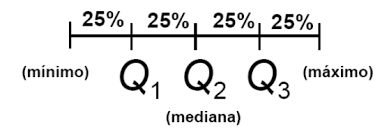

- primeiro quartil (designado por Q1/4) = quartil inferior = é o valor aos 25% da amostra ordenada = 25º percentil
- segundo quartil (designado por Q2/4) = mediana = é o valor até ao qual se encontra 50% da amostra ordenada = 50º percentil, ou 5º decil.
- terceiro quartil (designado por Q3/4) = quartil superior = valor a partir do qual se encontram 25% dos valores mais elevados = valor aos 75% da amostra ordenada = 75º percentil
- à diferença entre os quartis superior e inferior chama-se amplitude inter-quartil.

### Box Plot

O boxplot se baseia nos intervalos de interquartil, separando os outliers que estão fora do limite superior e inferior.
- Limite Inferior = Primeiro Quartil – 1,5 * (Terceiro Quartil – Primeiro Quartil)
- Limite Superior = Terceiro Quartil + 1,5 * (Terceiro Quartil – Primeiro

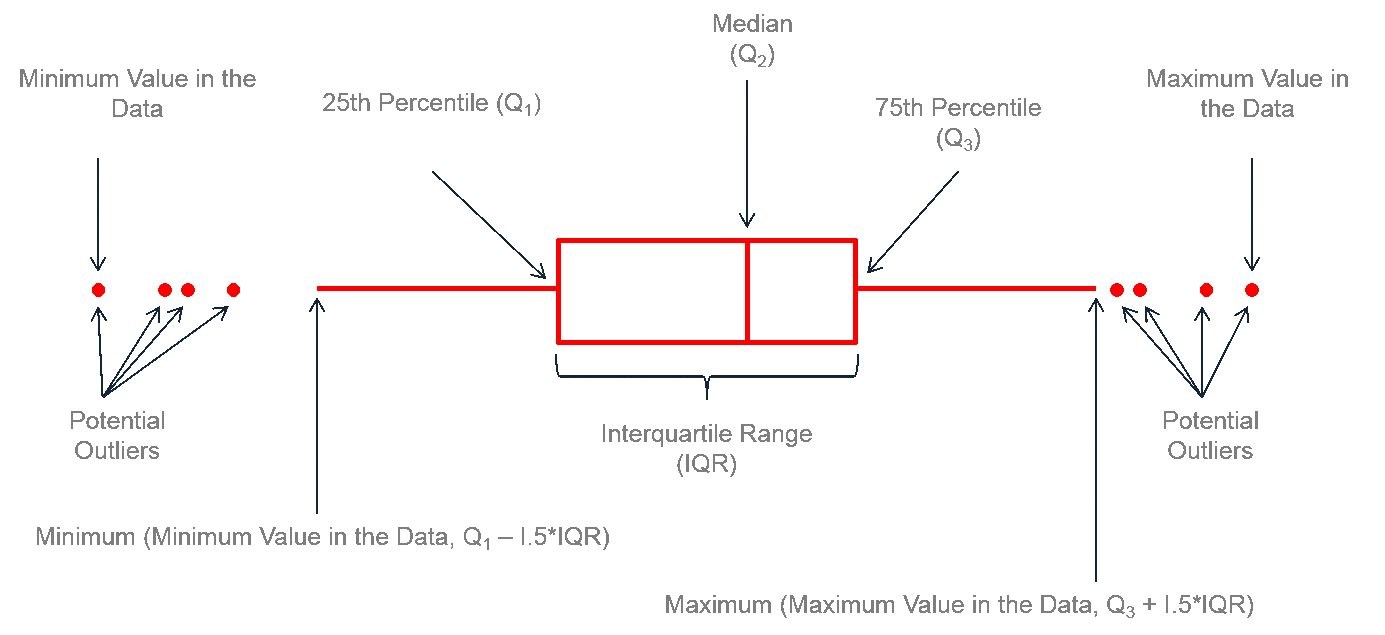



Primeiro Quaril 4.0
Terceiro Quaril 6.0
Média 5.668446244477172


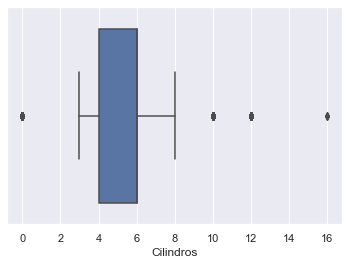

In [13]:
sns.boxplot(x=df['Cilindros'])

Q1 = df['Cilindros'].quantile(0.25)
Q3 = df['Cilindros'].quantile(0.75)
print("Primeiro Quaril", Q1)
print("Terceiro Quaril", Q3)
print("Média", df['Cilindros'].mean())

In [14]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Ano                 9.00
Cilindros           2.00
Popularidade     1460.00
Preco           21300.75
dtype: float64


In [15]:

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(8737, 8)

Primeiro Quaril 4.0
Terceiro Quaril 6.0


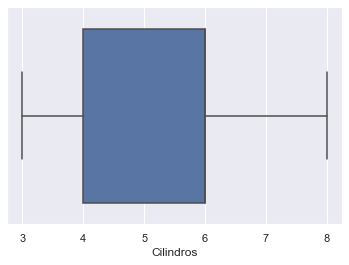

In [16]:
sns.boxplot(x=df['Cilindros'])
Q1 = df['Cilindros'].quantile(0.25)
Q3 = df['Cilindros'].quantile(0.75)
print("Primeiro Quaril", Q1)
print("Terceiro Quaril", Q3)

# Analise de dados - Uma Variável

Sempre buscamos a distribuição e frequência dos dados

- Estatística Descritiva
- Histograma
- Box Plot

## Formulação de perguntas

- Quais são as marcas que tem mais carros.
- Quais são os principais modelos.

In [17]:
df['Cilindros'].std()

1.3841384021266712

## Visualização de dados

Text(0.5, 0, 'Marcas')

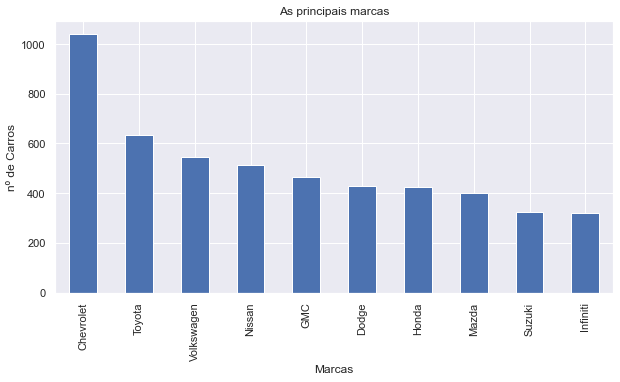

In [18]:
df.Marca.value_counts().nlargest(10).plot(kind="bar", figsize=(10,5))
plt.title("As principais marcas")
plt.ylabel('nº de Carros')
plt.xlabel("Marcas")

Text(0.5, 0, 'Modelos')

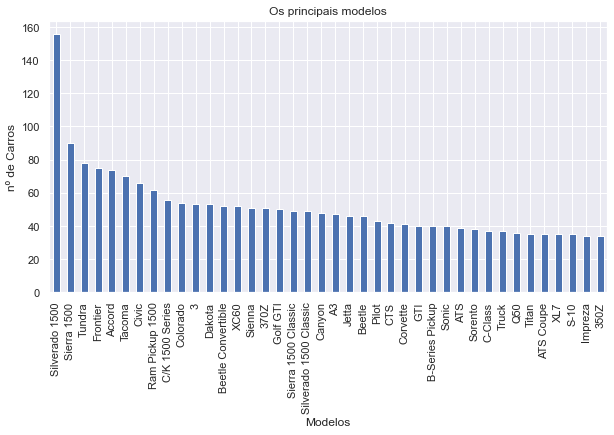

In [19]:
df.Modelo.value_counts().nlargest(40).plot(kind="bar", figsize=(10,5))
plt.title("Os principais modelos")
plt.ylabel('nº de Carros')
plt.xlabel("Modelos")

# Analisando Duas Variáveis

## Qualitativos

### Tabela de Contigência

In [44]:

tabela_contigencia = pd.crosstab(df.Macha, df.Estilo)
tabela_contigencia

Estilo,2dr Hatchback,2dr SUV,4dr Hatchback,4dr SUV,Cargo Minivan,Cargo Van,Convertible,Convertible SUV,Coupe,Crew Cab Pickup,Extended Cab Pickup,Passenger Minivan,Passenger Van,Regular Cab Pickup,Sedan,Wagon
Macha,,,,,,,,,,,,,,,,
AUTOMATED_MANUAL,36,0,38,25,0,0,62,0,15,0,0,0,0,0,139,18
AUTOMATIC,100,12,338,2018,37,51,191,8,361,508,281,319,45,124,1766,322
DIRECT_DRIVE,0,0,9,1,0,0,0,0,0,0,0,0,0,0,2,0
MANUAL,181,21,200,79,0,0,200,15,361,36,168,2,0,119,411,109
UNKNOWN,2,4,0,0,0,0,1,0,1,0,0,0,0,0,1,0


### Teste de Depêndencia

In [45]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def verificarDependencia(table):
    """ A partir de uma tabela responde se é dependente ou não"""
    stat, p, g_confianca, expected = ss.chi2_contingency(table)
    prob = 0.95
    critical = chi2.ppf(prob, g_confianca)
    if abs(stat) >= critical:
        print('Temos 95% de confiança que são dependentes')
    else:
        print('Temos 95% de confiança que são independentes')

In [55]:

verificarDependencia(pd.crosstab(df.Modelo, df.Marca))

São dependentes


In [56]:
## ANOVA OU MANOVA

# TESTE-F

# RESIDUO 
    #DIF. DRISTRIBUIÇÃO

#TEST A/B - TESTE DE HIPOTESE

#significância - 95%

# A
# B
# c

SyntaxError: invalid syntax (<ipython-input-56-d49ba35e3ee0>, line 8)

## Quantitativos

In [48]:
df.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Ano,Cilindros,Popularidade,Preco
Ano,1.0,-0.13,0.21,0.57
Cilindros,-0.13,1.0,0.00061,0.4
Popularidade,0.21,0.00061,1.0,0.11
Preco,0.57,0.4,0.11,1.0


<AxesSubplot:xlabel='Preco', ylabel='Ano'>

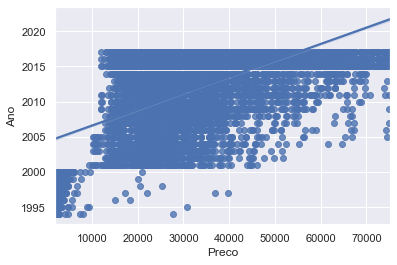

In [57]:
sns.regplot(data=df, x="Preco", y="Ano")
